ElasticNet(

    alpha=1.0,

    l1_ratio=0.5,
    
    max_iter=1000,
    
    tol=1e-4
)


| Parameter          | Meaning                    | Effect                          |
| ------------------ | -------------------------- | ------------------------------- |
| **alpha**          | Total regularization power | higher = stronger penalty       |
| **l1_ratio**       | Mix between Ridge & Lasso  | `1=Lasso`, `0=Ridge`, `0.5=mix` |
| **max_iter & tol** | Optimization controls      | similar to lasso                |


In [295]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [296]:
dataset=pd.read_csv("datasets/Algerian_forest_dataset.csv",header=1)
dataset.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [297]:
dataset.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [298]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


### Data cleaning 



In [299]:
## missing values

dataset[dataset.isnull().any(axis=1)]
df=dataset

#### The dataseat is converted into two sets based on region from 122th index , we can make a new column based on the region
1 : "Bejaia Region Dataset"
2 : "Sidi-Bel Abbes Region Dataset

Add new column with region

In [300]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [301]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [302]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [303]:
df.isnull().sum() 

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [304]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [305]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [306]:
df.iloc[[122]]
## removing 122 row 
df = df[df['month'] != 'month'].reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [307]:
df.columns
df.columns = df.columns.str.strip()
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


## below code is included but removed due to dataframn already changed

In [308]:
# Changing the requied columns as integer data type 
df[['month','year','day','Temperature']]=df[['month','year','day','Temperature']].astype('int')


df[[  'RH', 'Ws', 'Rain','FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[[  'RH', 'Ws', 'Rain','FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
# df.info()
df.columns

# df[[ ' RH', ' Ws', 'Rain ']]=df[[ ' RH', ' Ws', 'Rain ']].astype(int)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 28.6+ KB


#### another csv file for new file 

In [310]:
## lets save the cleaned dataset
df.to_csv("Algerian_forest_dataset.csv",index=False)

## EXTENSIVE EXPLORATORY DATA ANALYSIS


In [311]:
df.head()

df_copy=df.drop(['month','day','year'],axis=1)

In [312]:
df_copy.head() ## dropped the day , monthm, year 

df_copy
df_copy.columns


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [313]:
### Encoding of the categories in classes 
# df_copy
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [314]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

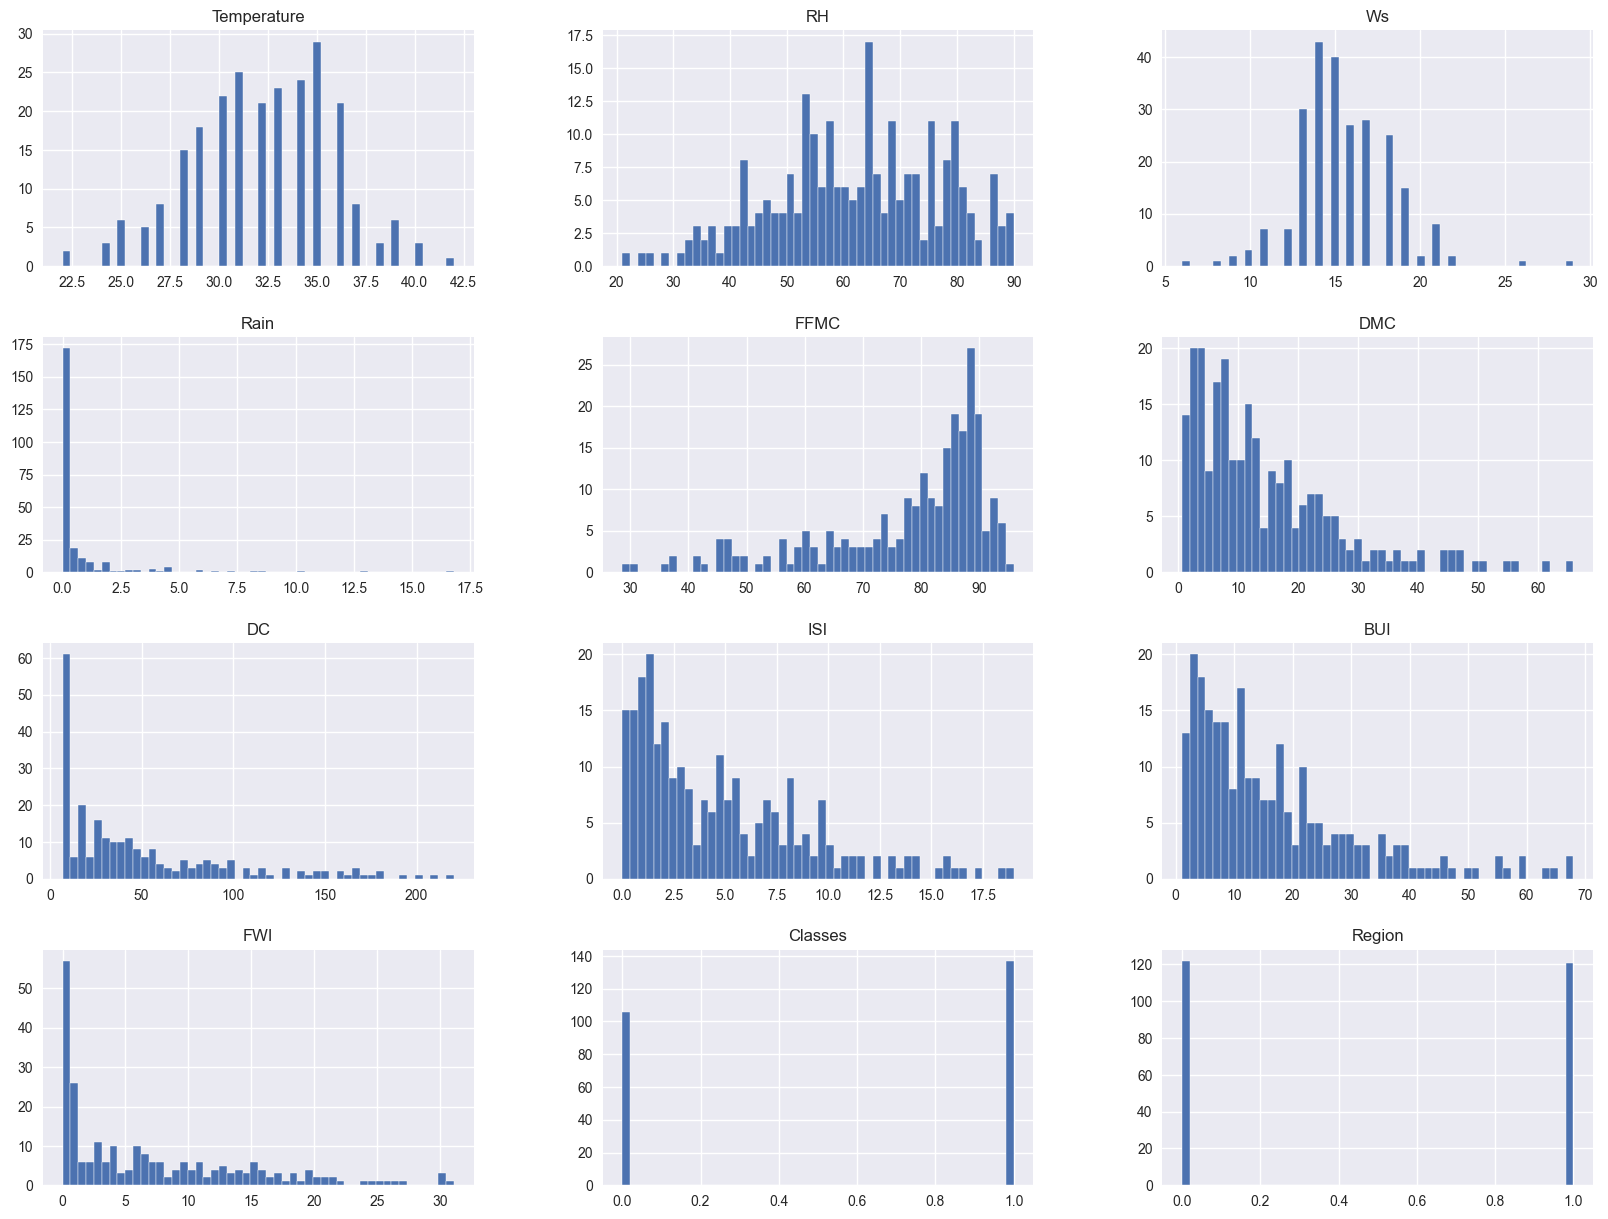

In [315]:
## plotting density plot for all features
import seaborn  
plt.style.use('seaborn-v0_8')
df_bro = df_copy.apply(pd.to_numeric, errors='coerce')

df_bro.hist(bins=50,figsize=(20,15))
plt.show()

In [316]:
## percentage for pie charts 
percentage=df_copy["Classes"].value_counts(normalize=True)*100

([<matplotlib.patches.Wedge at 0x1a9055d11d0>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'Fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'Not Fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

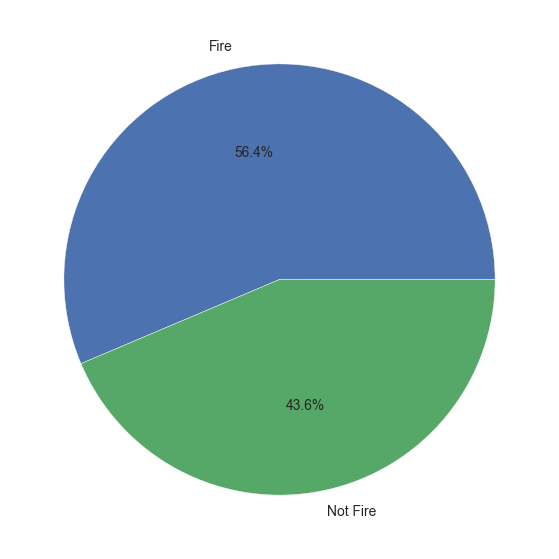

In [317]:
### plotting piechart 

classlabels=['Fire',"Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')


In [318]:
### Correlation

In [319]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 22.9 KB


In [320]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

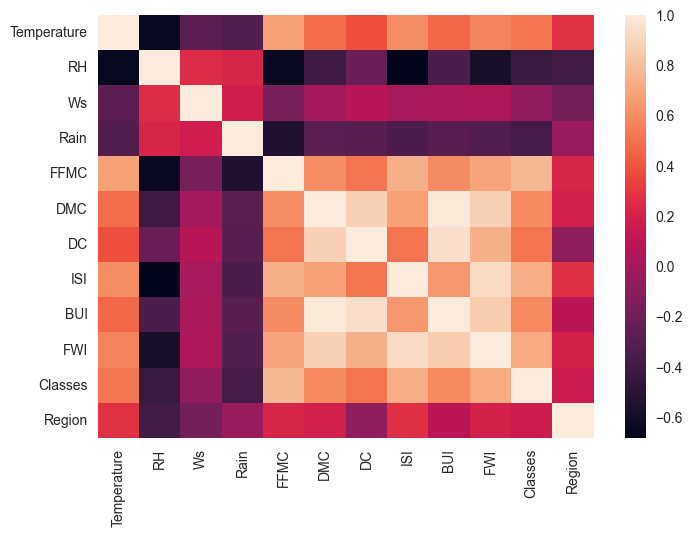

In [321]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

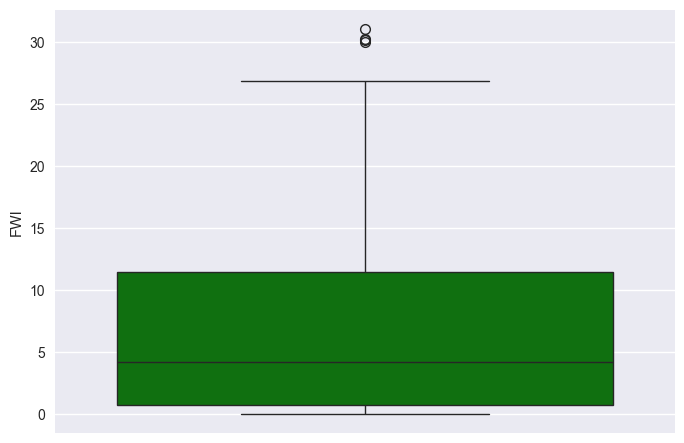

In [322]:
# box plots 
sns.boxplot(df_copy['FWI'],color='green')

Text(0.5, 1.0, 'Fire analysis of Bejaia Regions with month')

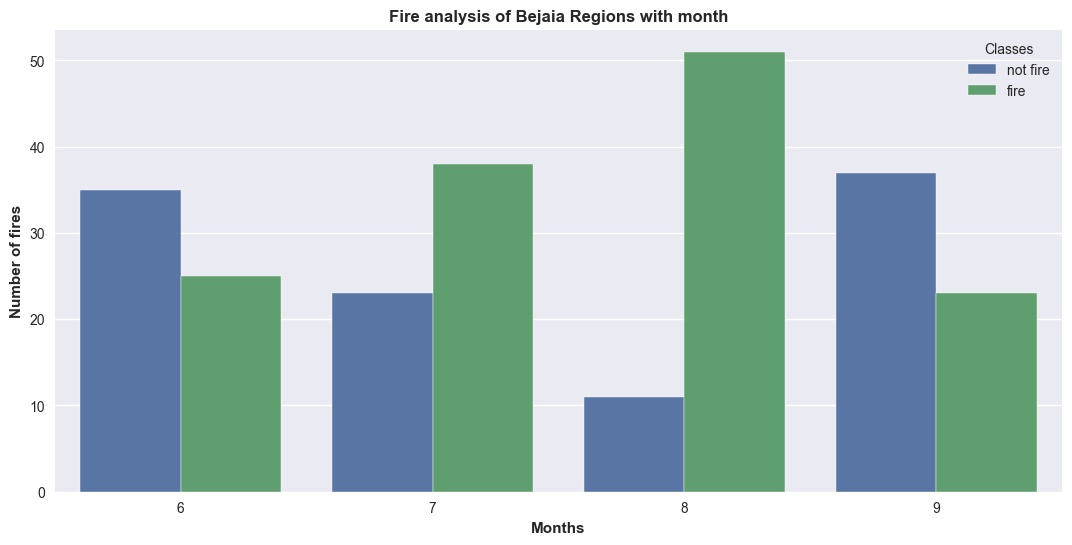

In [323]:
df_copy.head()
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
df ## monthly analaysis 
dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of fires",weight='bold')
plt.xlabel("Months",weight='bold')
plt.title("Fire analysis of Bejaia Regions with month",weight='bold')

### Its observed that August and September had the most number of forest fires for both regions . And from the above plot of mouths , we can understand few things 
Most of the fires happened in August and very high fires happened in only 3 months - June , july , and august 
Less fires was on September 

## Feature Selection &&& Model Training  of the data going on 

In [324]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [325]:
## Independant and dependant features 
X=df_copy.drop('FWI',axis=1)
Y=df['FWI']
X
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [326]:
## train test split
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,test_size=0.25,random_state=42)

In [327]:
X_TRAIN.shape
Y_TEST.shape
X_TEST.shape
Y_TRAIN.shape

(182,)

In [328]:
### Feature selection based on correlation
X_TRAIN.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

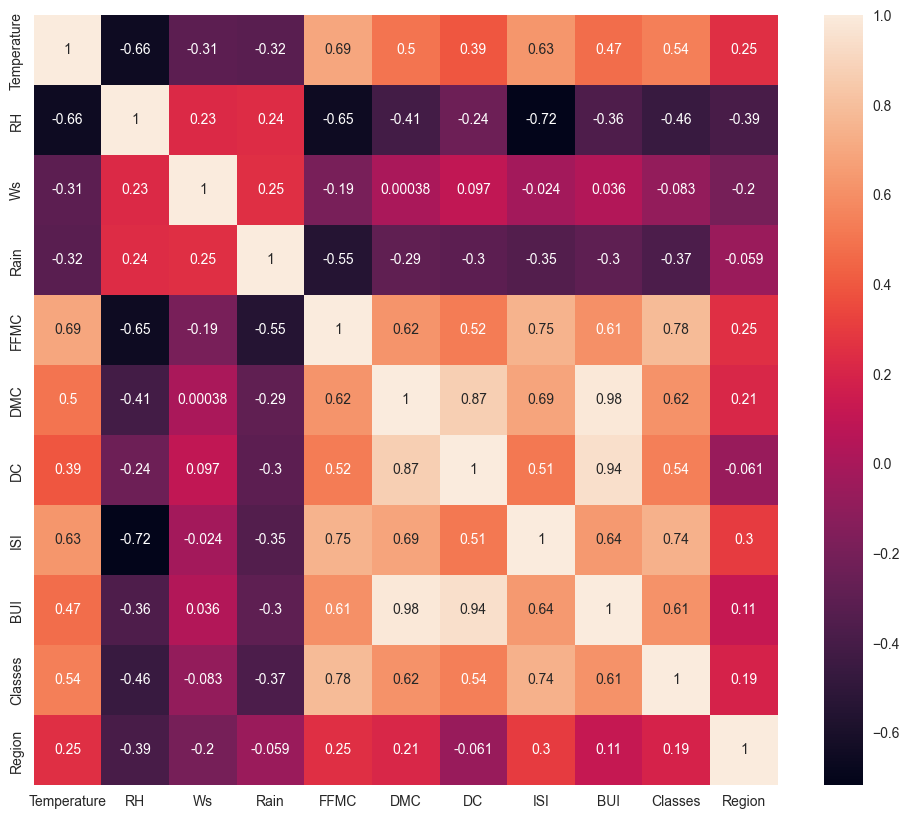

In [329]:
## checking the multicollinearity 
plt.figure(figsize=(12,10))
corr=X_TRAIN.corr()
sns.heatmap(corr,annot=True)


In [330]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]> threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [331]:
corr_features = correlation(X_TRAIN,0.85)

In [332]:
## threshold - Domain expertise 
## dropiing features when correaltion is more than 0.85
X_TEST.drop(columns=[col for col in corr_features if col in X_TEST.columns], inplace=True)
X_TRAIN.drop(columns=[col for col in corr_features if col in X_TRAIN.columns], inplace=True)
X_TRAIN.shape,X_TEST.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization
#### Scaling is mainly about helping the algorithm learn efficiently, 
### One axis is 1 km long, another axis is 1 meter long.

Without scaling, your steps along the tiny axis are almost negligible compared to the long axis → hard to reach the top efficiently.

Scaling makes all axes “similar length”, so your climb is smooth and faster.

In [333]:


from sklearn.preprocessing import StandardScaler

In [334]:
scaler = StandardScaler()
X_TRAIN_scaled = scaler.fit_transform(X_TRAIN)
X_TEST_scaled = scaler.transform(X_TEST)

In [335]:
X_TEST_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

## Box plots to undertand effect of standard scaler 

Text(0.5, 1.0, 'X_train after scaling')

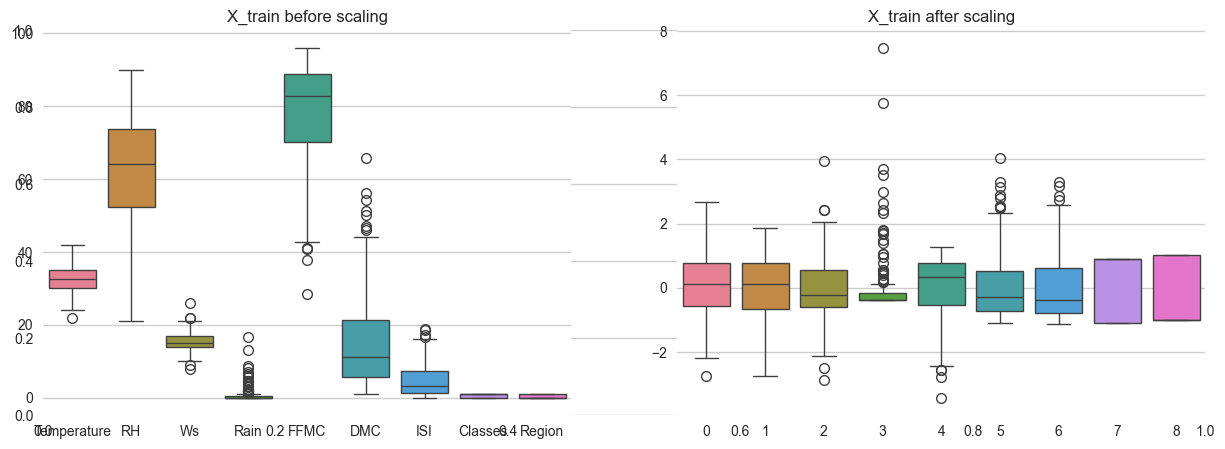

In [336]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_TRAIN)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_TRAIN_scaled)
plt.title("X_train after scaling")

## Linear Regression Model

Mean absoltute error  0.546823646524997
R2 Score 0.9847657384266951


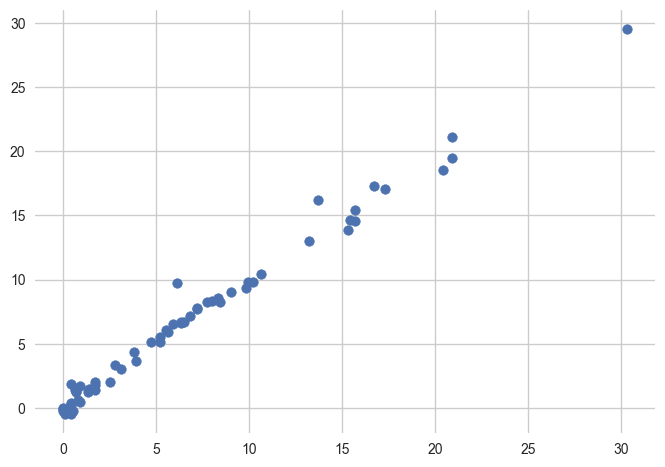

In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression() 
linreg.fit(X_TRAIN_scaled,Y_TRAIN)    
y_pred = linreg.predict(X_TEST_scaled)
mae=mean_absolute_error(Y_TEST,y_pred)
score=r2_score(Y_TEST,y_pred)
print("Mean absoltute error ",mae)
print("R2 Score",score)
plt.scatter(Y_TEST,y_pred)

### Lasso regression

Mean absoltute error  1.133175994914409
R2 Score 0.9492020263112388


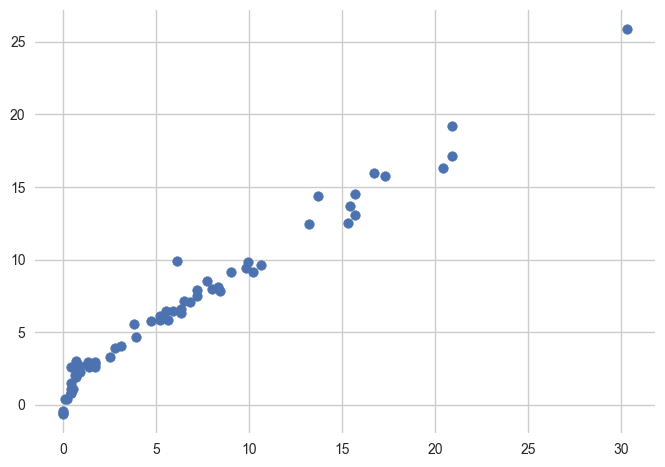

In [350]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=Lasso() 
linreg.fit(X_TRAIN_scaled,Y_TRAIN)    
y_pred = linreg.predict(X_TEST_scaled)
mae=mean_absolute_error(Y_TEST,y_pred)
score=r2_score(Y_TEST,y_pred)
print("Mean absoltute error ",mae)
print("R2 Score",score)
plt.scatter(Y_TEST,y_pred)

### Ridge Regression

Mean absoltute error  0.5642305340105691
R2 Score 0.9842993364555513


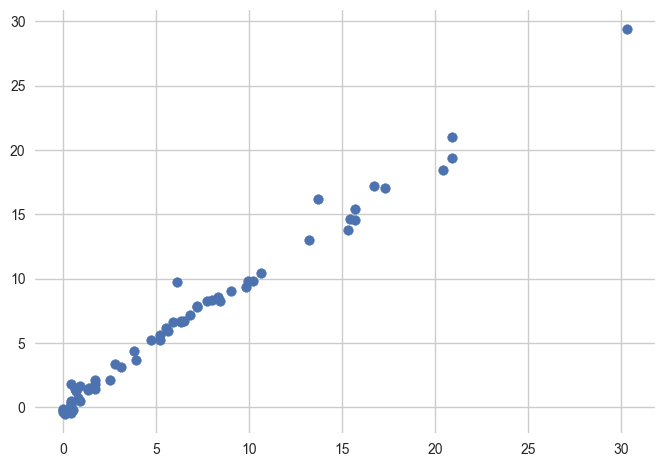

In [351]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=Ridge() 
linreg.fit(X_TRAIN_scaled,Y_TRAIN)    
y_pred = linreg.predict(X_TEST_scaled)
mae=mean_absolute_error(Y_TEST,y_pred)
score=r2_score(Y_TEST,y_pred)
print("Mean absoltute error ",mae)
print("R2 Score",score)
plt.scatter(Y_TEST,y_pred)

Mean absoltute error  1.8822353634896
R2 Score 0.8753460589519703


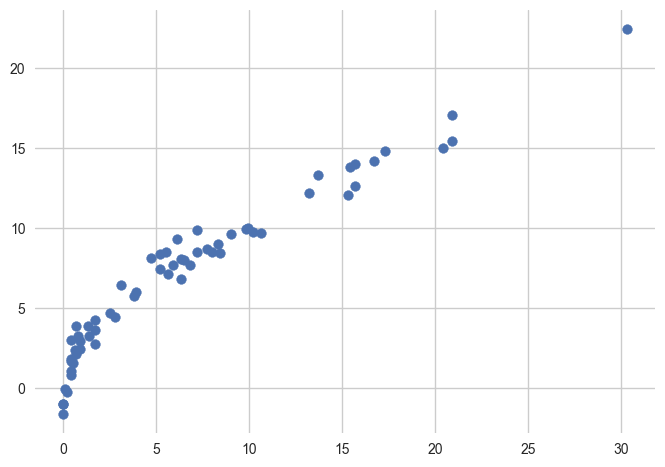

In [352]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=ElasticNet() 
linreg.fit(X_TRAIN_scaled,Y_TRAIN)    
y_pred = linreg.predict(X_TEST_scaled)
mae=mean_absolute_error(Y_TEST,y_pred)
score=r2_score(Y_TEST,y_pred)
print("Mean absoltute error ",mae)
print("R2 Score",score)
plt.scatter(Y_TEST,y_pred)

#### Cross Validation Lasso 


In [353]:
from sklearn.linear_model import LassoCV

In [356]:
lassocv=LassoCV(cv=5)
lassocv.fit(X_TRAIN_scaled,Y_TRAIN)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [359]:
lassocv.predict(X_TEST_scaled)
lassocv.alpha_


np.float64(0.05725391318234408)

In [362]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [364]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

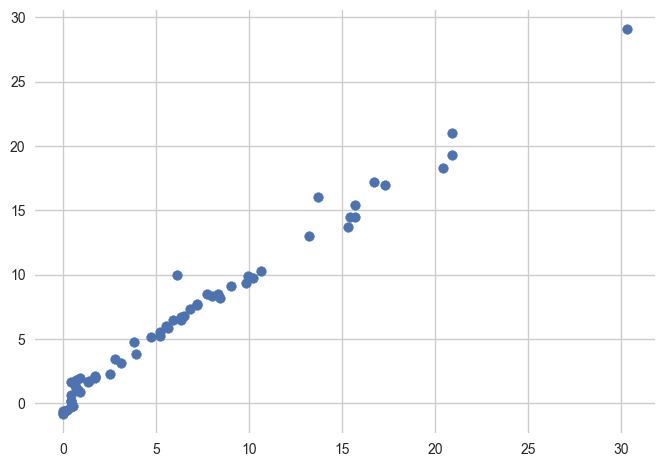

In [367]:
y_pred=lassocv.predict(X_TEST_scaled)
plt.scatter(Y_TEST,y_pred)

#### RIDGE REGRESSION CV

mean abosolute error  0.5642305340105691
R2 Score 0.9842993364555513


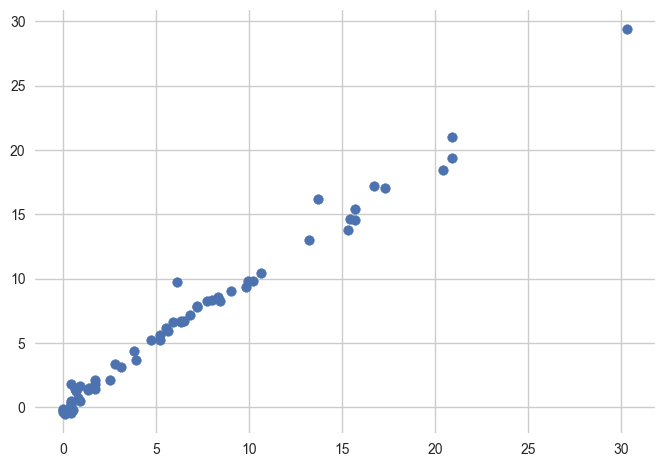

In [376]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_TRAIN_scaled,Y_TRAIN)
y_pred=ridgecv.predict(X_TEST_scaled)
plt.scatter(Y_TEST,y_pred)
mae=mean_absolute_error(Y_TEST,y_pred)
score=r2_score(Y_TEST,y_pred)
print("mean abosolute error ",mae)
print("R2 Score",score)

### ElasticNetCV

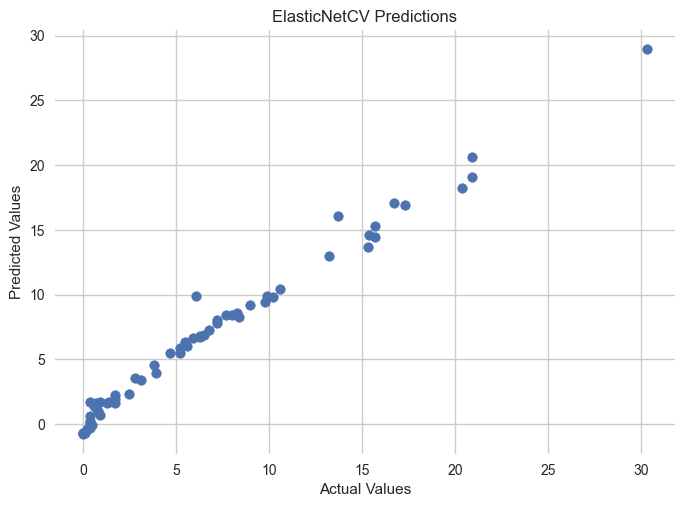

Mean Absolute Error: 0.6575946731430901
R2 Score: 0.9814217587854941


In [382]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
# Initialize ElasticNetCV
elastic_model = ElasticNetCV(cv=5, l1_ratio=0.5)  # 5-fold CV, mix of L1 and L2
# Fit on scaled training data
elastic_model.fit(X_TRAIN_scaled, Y_TRAIN)
# Predict on scaled test data
y_pred = elastic_model.predict(X_TEST_scaled)
# Plot predicted vs actual
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ElasticNetCV Predictions")
plt.show()

# Calculate metrics
mae = mean_absolute_error(Y_TEST, y_pred)
score = r2_score(Y_TEST, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", score)


### Pickling the machine Learning Model 
Pickling in Machine Learning is the process of serializing a trained model or any Python object (like a scaler, encoder, or pipeline) into a file so that it can be saved, shared, and later loaded without retraining.

Serialization → converting an object into a byte stream that can be stored on disk.

Deserialization (Unpickling) → loading the object back into Python to use it.

Why it’s used in ML:

Avoid retraining models every time you want to make predictions.

Share models with others.

Deploy models in production systems

In [383]:
### pickling the machine learning models , preprocessing model standardscaler
scaler 

,copy,True
,with_mean,True
,with_std,True


In [385]:
Ridge

sklearn.linear_model._ridge.Ridge

In [389]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(Ridge,open('ridge.pkl','wb'))